<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
num_classes = 10
batch_size = 32
epoch = 24
img_rows, img_cols = 28,28

In [ ]:
# Загружаем данные из набора данных Fashion MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Проверяем, используется ли формат данных 'channels_first' (где канал идет первым)
if K.image_data_format() == 'channels_first':
    # Преобразуем данные в формат (количество_изображений, каналы, высота, ширина)
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    # Устанавливаем форму входа для модели в случае 'channels_first'
    input_shape = (1, img_rows, img_cols)
else:
    # Преобразуем данные в формат (количество_изображений, высота, ширина, каналы)
    trainX = trainX.reshape(trainX.shape[0], img_rows, img_cols, 1)
    testX = testX.reshape(testX.shape[0], img_rows, img_cols, 1)
    # Устанавливаем форму входа для модели в случае 'channels_last'
    input_shape = (img_rows, img_cols, 1)

# Преобразуем данные в тип float32 для использования в нейронной сети
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Нормализуем данные (приводим пиксели в диапазон [0, 1])
trainX /= 255
testX /= 255

# Преобразуем метки классов в one-hot кодировку для обучения
trainy = keras.utils.to_categorical(trainy, num_classes=num_classes)
testy = keras.utils.to_categorical(testy, num_classes=num_classes)

# Выводим форму данных, чтобы проверить корректность
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print('Train: Y = ', trainy.shape)
print('Test: Y = ', testy.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
Train: Y =  (60000, 10)
Test: Y =  (10000, 10)


## 1.3. Визуализируем часть данных из датасета

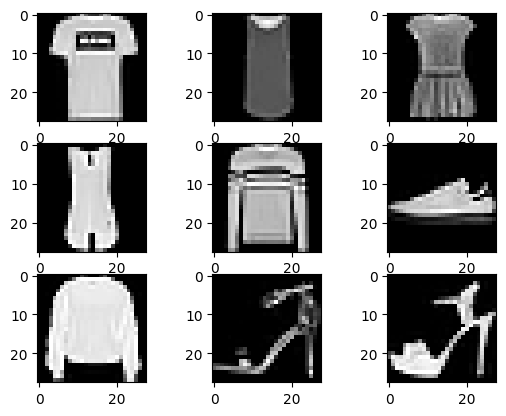

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [ ]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=batch_size, epochs=EPOCH, validation_data=(testX,testy))

model.evaluate(testX, testy) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8033 - loss: 0.5517 - val_accuracy: 0.8899 - val_loss: 0.3117
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8997 - loss: 0.2727 - val_accuracy: 0.9014 - val_loss: 0.2688
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9189 - loss: 0.2206 - val_accuracy: 0.9057 - val_loss: 0.2598
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9306 - loss: 0.1894 - val_accuracy: 0.9140 - val_loss: 0.2377
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9435 - loss: 0.1557 - val_accuracy: 0.9105 - val_loss: 0.2520
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9096 - loss: 0.2678


[0.251964271068573, 0.9104999899864197]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

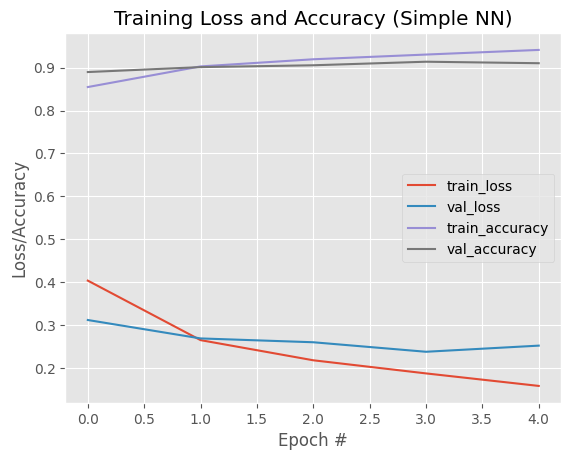

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


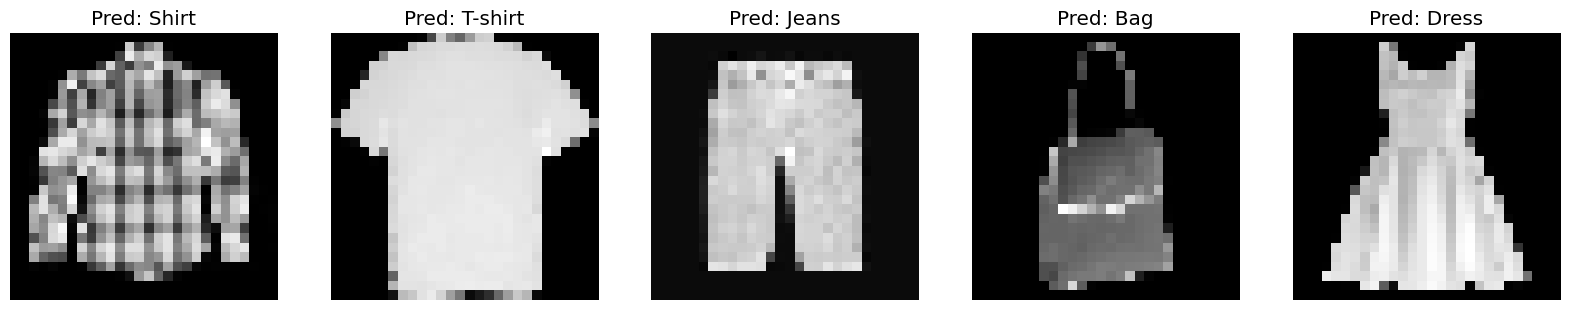

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Пример списка путей к изображениям
image_paths = [
    '/content/drive/MyDrive/fashion_dataset/shirt.jpg',
    '/content/drive/MyDrive/fashion_dataset/tshirt.jpg',
    '/content/drive/MyDrive/fashion_dataset/jeans.jpg',
    '/content/drive/MyDrive/fashion_dataset/bag.jpg',
    '/content/drive/MyDrive/fashion_dataset/dress.jpg'
]

# Словарь с метками классов
label_dict = {
    0: 'T-shirt',
    1: 'Jeans',
    2: 'Sweater',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Настроим отображение 5 изображений в строке
plt.figure(figsize=(20, 4))

# Проходим по путям и обрабатываем изображения
for i, image_path in enumerate(image_paths[:5]):  # Печатаем только первые 5 изображенийjeanss
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Преобразование изображения в оттенки серого
    image = cv2.resize(image, (28, 28))  # Изменение разрешения изображения
    image = cv2.bitwise_not(image)  # Инверсия цветов (если нужно)
    orig = image.copy()
    image = image.reshape(-1, 28, 28, 1)  # Приводим изображение в форму (1, 28, 28, 1)

    # Получаем предсказания для изображения
    preds = model.predict(image)
    pred_label = label_dict[np.argmax(preds)]  # Получаем метку класса из предсказаний

    # Отображаем изображение с предсказанием
    plt.subplot(1, 5, i+1)  # Располагаем изображения в одной строке
    plt.imshow(orig, cmap='gray')  # Отображаем оригинальное изображение
    plt.title(f'Pred: {pred_label}')  # Добавляем заголовок с предсказанием
    plt.axis('off')  # Убираем оси для красоты

plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import gradio as gr
from keras.models import load_model

In [ ]:
# Словарь с метками классов (категории одежды)
label_dict = {
    0: 'T-shirt',
    1: 'Jeans',
    2: 'Sweater',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
# Функция для предобработки изображения
def preprocess_image_new(img, compression_size=28):
    image = img.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Преобразуем в оттенки серого
    image = cv2.resize(image, (compression_size, compression_size))  # Изменяем размер
    image = cv2.bitwise_not(image)  # Инвертируем цвета
    image = image.reshape(-1, compression_size, compression_size, 1)  # Преобразуем в нужную форму
    image = image.astype("float") / 255.0  # Нормализация
    return image

In [ ]:
# Загрузка предобученной модели
model = load_model('/content/drive/MyDrive/models/best_model_3_1.h5')

In [ ]:
# Функция для предсказания класса на основе изображения
def get_predict_new(img, preprocess_func=preprocess_image_new):
    image = preprocess_func(img.copy())  # Применяем предобработку
    preds = model.predict(image)  # Делаем предсказание
    pred_label = label_dict[np.argmax(preds)]  # Получаем метку класса
    return pred_label

In [ ]:
# Интерфейс Gradio для загрузки изображений и отображения предсказаний
def gradio_interface(img):
    pred_label = get_predict_new(img)  # Получаем предсказание для загруженного изображения
    return pred_label

In [ ]:
# Настройка интерфейса Gradio
interface_new = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Image(label="Загрузите изображение"),  # Ввод изображения
    outputs=gr.Label(),  # Вывод метки класса
    examples=[  # Примеры изображений для теста
        '/content/drive/MyDrive/fashion_dataset/shirt.jpg',
        '/content/drive/MyDrive/fashion_dataset/tshirt.jpg',
        '/content/drive/MyDrive/fashion_dataset/jeans.jpg',
        '/content/drive/MyDrive/fashion_dataset/bag.jpg',
        '/content/drive/MyDrive/fashion_dataset/dress.jpg'
    ]
)

# Запуск интерфейса
interface_new.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ad73268bd6ef4a5b27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ad73268bd6ef4a5b27.gradio.live


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import SGD, Adam
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
from pathlib import Path
from keras.layers import Dropout

In [ ]:
# Путь к папке с данными
base_directory = '/content/drive/MyDrive/animals_dataset'

# Сбор всех изображений .jpeg
imagePaths = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.lower().endswith('.jpeg'):
            image_path = os.path.join(root, file)
            if 'Бабочки' in root or 'Слоны' in root or 'Пауки' in root:
                imagePaths.append(image_path)

print(f"Всего изображений: {len(imagePaths)}")

Всего изображений: 3318


In [ ]:
# инициализируем данные и метки
data = []
labels = []

In [ ]:
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32))# меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
    # а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255
labels = np.array(labels)
data.shape, labels.shape

((3318, 32, 32, 3), (3318,))

In [ ]:
# Разбиваем данные на обучающую и тестовую выборки (75% для обучения, 25% для тестирования)
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25,
                                                  random_state=42)

# Преобразуем метки в формат one-hot с использованием LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Проверяем формы выборок
trainX.shape, testX.shape, trainY.shape, testY.shape

((2488, 32, 32, 3), (830, 32, 32, 3), (2488, 3), (830, 3))

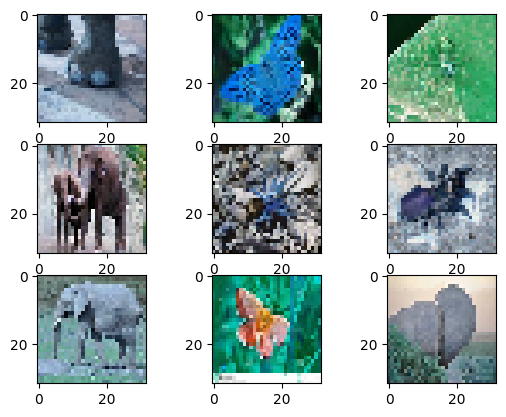

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

compression_size = 32
input_shape = (compression_size, compression_size, 3)

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,475 (880.76 KB)

 Trainable params: 225,027 (879.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath="best_model_3_2.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,  # Уменьшение learning rate, если потери не улучшаются
    min_lr=1e-6
)

In [ ]:
from keras.optimizers import Adam

# Параметры
INIT_LR = 0.00001  # Начальная скорость обучения
EPOCHS = 1000
BATCH_SIZE = 64  # Увеличение размера батча для ускорения обучения

# Оптимизатор Adam
opt = Adam(learning_rate=INIT_LR)

In [ ]:
# Компиляция модели
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Обучение модели
history = model.fit(
    trainX,
    trainY,
    batch_size=BATCH_SIZE,  # Увеличен размер батча
    epochs=EPOCHS,
    validation_data=(testX, testY),
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1  # Вывод прогресса обучения
)

model.evaluate(testX, testY)

Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3754 - loss: 2.5210
Epoch 1: val_loss improved from inf to 1.16497, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.3757 - loss: 2.5177 - val_accuracy: 0.2904 - val_loss: 1.1650 - learning_rate: 1.0000e-05
Epoch 2/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4072 - loss: 1.9625
Epoch 2: val_loss did not improve from 1.16497
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4087 - loss: 1.9547 - val_accuracy: 0.2904 - val_loss: 1.2681 - learning_rate: 1.0000e-05
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4557 - loss: 1.6984
Epoch 3: val_loss did not improve from 1.16497
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4560 - loss: 1.6967 - val_accuracy: 0.2916 - val_loss: 1.3102 - learning_rate: 1.0000e-05
Epoch 4/1000
38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4741 - loss: 1.5122
Epoch 4: val_loss did not improve from 1.16497
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4748 - loss: 1.5108 - val_accuracy: 0.3289 - val_loss: 1.2590 - learning_rate: 1.0000e-05
Epoch 5/1000
37/39 ━━━━━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5525 - loss: 1.1612 - val_accuracy: 0.4578 - val_loss: 1.0989 - learning_rate: 1.0000e-05
Epoch 7/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5285 - loss: 1.1730
Epoch 7: val_loss improved from 1.09892 to 1.02785, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5313 - loss: 1.1663 - val_accuracy: 0.4831 - val_loss: 1.0278 - learning_rate: 1.0000e-05
Epoch 8/1000
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 1.0632
Epoch 8: val_loss improved from 1.02785 to 0.96875, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5748 - loss: 1.0609 - val_accuracy: 0.5265 - val_loss: 0.9688 - learning_rate: 1.0000e-05
Epoch 9/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 0.9862
Epoch 9: val_loss improved from 0.96875 to 0.91798, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5877 - loss: 0.9843 - val_accuracy: 0.5590 - val_loss: 0.9180 - learning_rate: 1.0000e-05
Epoch 10/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6247 - loss: 0.9196
Epoch 10: val_loss improved from 0.91798 to 0.87782, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6244 - loss: 0.9206 - val_accuracy: 0.5892 - val_loss: 0.8778 - learning_rate: 1.0000e-05
Epoch 11/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6329 - loss: 0.8976
Epoch 11: val_loss improved from 0.87782 to 0.83628, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6324 - loss: 0.8980 - val_accuracy: 0.6229 - val_loss: 0.8363 - learning_rate: 1.0000e-05
Epoch 12/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6178 - loss: 0.8808
Epoch 12: val_loss improved from 0.83628 to 0.79921, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6181 - loss: 0.8828 - val_accuracy: 0.6494 - val_loss: 0.7992 - learning_rate: 1.0000e-05
Epoch 13/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.8770
Epoch 13: val_loss improved from 0.79921 to 0.77123, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6303 - loss: 0.8757 - val_accuracy: 0.6675 - val_loss: 0.7712 - learning_rate: 1.0000e-05
Epoch 14/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6516 - loss: 0.8284
Epoch 14: val_loss improved from 0.77123 to 0.74904, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6517 - loss: 0.8281 - val_accuracy: 0.6831 - val_loss: 0.7490 - learning_rate: 1.0000e-05
Epoch 15/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6686 - loss: 0.8057
Epoch 15: val_loss improved from 0.74904 to 0.73210, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6688 - loss: 0.8049 - val_accuracy: 0.6880 - val_loss: 0.7321 - learning_rate: 1.0000e-05
Epoch 16/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.7974
Epoch 16: val_loss improved from 0.73210 to 0.71455, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6593 - loss: 0.7973 - val_accuracy: 0.6904 - val_loss: 0.7145 - learning_rate: 1.0000e-05
Epoch 17/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6785 - loss: 0.7801
Epoch 17: val_loss improved from 0.71455 to 0.70351, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6780 - loss: 0.7787 - val_accuracy: 0.6988 - val_loss: 0.7035 - learning_rate: 1.0000e-05
Epoch 18/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6810 - loss: 0.7364
Epoch 18: val_loss improved from 0.70351 to 0.69352, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6804 - loss: 0.7376 - val_accuracy: 0.7084 - val_loss: 0.6935 - learning_rate: 1.0000e-05
Epoch 19/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6926 - loss: 0.7112
Epoch 19: val_loss improved from 0.69352 to 0.68552, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6927 - loss: 0.7115 - val_accuracy: 0.7205 - val_loss: 0.6855 - learning_rate: 1.0000e-05
Epoch 20/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6793 - loss: 0.7217
Epoch 20: val_loss improved from 0.68552 to 0.67789, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6801 - loss: 0.7216 - val_accuracy: 0.7169 - val_loss: 0.6779 - learning_rate: 1.0000e-05
Epoch 21/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6936 - loss: 0.7142
Epoch 21: val_loss improved from 0.67789 to 0.67241, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6933 - loss: 0.7137 - val_accuracy: 0.7169 - val_loss: 0.6724 - learning_rate: 1.0000e-05
Epoch 22/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7087 - loss: 0.6773
Epoch 22: val_loss improved from 0.67241 to 0.66653, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7088 - loss: 0.6776 - val_accuracy: 0.7193 - val_loss: 0.6665 - learning_rate: 1.0000e-05
Epoch 23/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7258 - loss: 0.6597
Epoch 23: val_loss improved from 0.66653 to 0.66003, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7231 - loss: 0.6651 - val_accuracy: 0.7181 - val_loss: 0.6600 - learning_rate: 1.0000e-05
Epoch 24/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7002 - loss: 0.7068
Epoch 24: val_loss improved from 0.66003 to 0.65472, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7016 - loss: 0.7014 - val_accuracy: 0.7253 - val_loss: 0.6547 - learning_rate: 1.0000e-05
Epoch 25/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7325 - loss: 0.6160
Epoch 25: val_loss improved from 0.65472 to 0.64917, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7321 - loss: 0.6188 - val_accuracy: 0.7325 - val_loss: 0.6492 - learning_rate: 1.0000e-05
Epoch 26/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.6412
Epoch 26: val_loss improved from 0.64917 to 0.64498, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7262 - loss: 0.6402 - val_accuracy: 0.7386 - val_loss: 0.6450 - learning_rate: 1.0000e-05
Epoch 27/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7288 - loss: 0.6303
Epoch 27: val_loss improved from 0.64498 to 0.64292, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7292 - loss: 0.6299 - val_accuracy: 0.7349 - val_loss: 0.6429 - learning_rate: 1.0000e-05
Epoch 28/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7159 - loss: 0.6390
Epoch 28: val_loss improved from 0.64292 to 0.63769, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7180 - loss: 0.6358 - val_accuracy: 0.7386 - val_loss: 0.6377 - learning_rate: 1.0000e-05
Epoch 29/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6083
Epoch 29: val_loss improved from 0.63769 to 0.63099, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7355 - loss: 0.6090 - val_accuracy: 0.7446 - val_loss: 0.6310 - learning_rate: 1.0000e-05
Epoch 30/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7593 - loss: 0.5783
Epoch 30: val_loss improved from 0.63099 to 0.62869, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7585 - loss: 0.5805 - val_accuracy: 0.7470 - val_loss: 0.6287 - learning_rate: 1.0000e-05
Epoch 31/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7431 - loss: 0.6146
Epoch 31: val_loss improved from 0.62869 to 0.62342, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7429 - loss: 0.6135 - val_accuracy: 0.7446 - val_loss: 0.6234 - learning_rate: 1.0000e-05
Epoch 32/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7272 - loss: 0.6278
Epoch 32: val_loss improved from 0.62342 to 0.62083, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7278 - loss: 0.6267 - val_accuracy: 0.7470 - val_loss: 0.6208 - learning_rate: 1.0000e-05
Epoch 33/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7593 - loss: 0.5638
Epoch 33: val_loss improved from 0.62083 to 0.61787, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7587 - loss: 0.5658 - val_accuracy: 0.7482 - val_loss: 0.6179 - learning_rate: 1.0000e-05
Epoch 34/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.5920
Epoch 34: val_loss improved from 0.61787 to 0.61432, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7498 - loss: 0.5902 - val_accuracy: 0.7506 - val_loss: 0.6143 - learning_rate: 1.0000e-05
Epoch 35/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7573 - loss: 0.5989
Epoch 35: val_loss improved from 0.61432 to 0.60919, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7586 - loss: 0.5952 - val_accuracy: 0.7506 - val_loss: 0.6092 - learning_rate: 1.0000e-05
Epoch 36/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.5670
Epoch 36: val_loss improved from 0.60919 to 0.60583, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7632 - loss: 0.5626 - val_accuracy: 0.7566 - val_loss: 0.6058 - learning_rate: 1.0000e-05
Epoch 37/1000
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7608 - loss: 0.5380
Epoch 37: val_loss improved from 0.60583 to 0.60223, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7630 - loss: 0.5390 - val_accuracy: 0.7627 - val_loss: 0.6022 - learning_rate: 1.0000e-05
Epoch 38/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7701 - loss: 0.5401
Epoch 38: val_loss improved from 0.60223 to 0.59917, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7712 - loss: 0.5391 - val_accuracy: 0.7663 - val_loss: 0.5992 - learning_rate: 1.0000e-05
Epoch 39/1000
30/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7762 - loss: 0.5218
Epoch 39: val_loss improved from 0.59917 to 0.59509, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7782 - loss: 0.5214 - val_accuracy: 0.7651 - val_loss: 0.5951 - learning_rate: 1.0000e-05
Epoch 40/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7805 - loss: 0.5374
Epoch 40: val_loss improved from 0.59509 to 0.59201, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7816 - loss: 0.5334 - val_accuracy: 0.7639 - val_loss: 0.5920 - learning_rate: 1.0000e-05
Epoch 41/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7673 - loss: 0.5429
Epoch 41: val_loss improved from 0.59201 to 0.59120, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7730 - loss: 0.5327 - val_accuracy: 0.7675 - val_loss: 0.5912 - learning_rate: 1.0000e-05
Epoch 42/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7999 - loss: 0.4879
Epoch 42: val_loss improved from 0.59120 to 0.58772, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7983 - loss: 0.4900 - val_accuracy: 0.7663 - val_loss: 0.5877 - learning_rate: 1.0000e-05
Epoch 43/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8008 - loss: 0.4868
Epoch 43: val_loss improved from 0.58772 to 0.58435, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7992 - loss: 0.4877 - val_accuracy: 0.7687 - val_loss: 0.5844 - learning_rate: 1.0000e-05
Epoch 44/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8003 - loss: 0.4616
Epoch 44: val_loss improved from 0.58435 to 0.58097, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8014 - loss: 0.4630 - val_accuracy: 0.7723 - val_loss: 0.5810 - learning_rate: 1.0000e-05
Epoch 45/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7937 - loss: 0.5132
Epoch 45: val_loss improved from 0.58097 to 0.57687, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7949 - loss: 0.5080 - val_accuracy: 0.7711 - val_loss: 0.5769 - learning_rate: 1.0000e-05
Epoch 46/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7955 - loss: 0.4835
Epoch 46: val_loss improved from 0.57687 to 0.57542, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7948 - loss: 0.4842 - val_accuracy: 0.7723 - val_loss: 0.5754 - learning_rate: 1.0000e-05
Epoch 47/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8235 - loss: 0.4475
Epoch 47: val_loss improved from 0.57542 to 0.57169, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8205 - loss: 0.4513 - val_accuracy: 0.7735 - val_loss: 0.5717 - learning_rate: 1.0000e-05
Epoch 48/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8101 - loss: 0.4706
Epoch 48: val_loss improved from 0.57169 to 0.57083, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8097 - loss: 0.4714 - val_accuracy: 0.7699 - val_loss: 0.5708 - learning_rate: 1.0000e-05
Epoch 49/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8014 - loss: 0.4573
Epoch 49: val_loss improved from 0.57083 to 0.56887, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8006 - loss: 0.4590 - val_accuracy: 0.7747 - val_loss: 0.5689 - learning_rate: 1.0000e-05
Epoch 50/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8277 - loss: 0.4402
Epoch 50: val_loss improved from 0.56887 to 0.56611, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8268 - loss: 0.4408 - val_accuracy: 0.7771 - val_loss: 0.5661 - learning_rate: 1.0000e-05
Epoch 51/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8177 - loss: 0.4397
Epoch 51: val_loss improved from 0.56611 to 0.56368, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8182 - loss: 0.4387 - val_accuracy: 0.7771 - val_loss: 0.5637 - learning_rate: 1.0000e-05
Epoch 52/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.4259
Epoch 52: val_loss improved from 0.56368 to 0.55998, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8199 - loss: 0.4280 - val_accuracy: 0.7795 - val_loss: 0.5600 - learning_rate: 1.0000e-05
Epoch 53/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8387 - loss: 0.4122
Epoch 53: val_loss improved from 0.55998 to 0.55977, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8384 - loss: 0.4122 - val_accuracy: 0.7759 - val_loss: 0.5598 - learning_rate: 1.0000e-05
Epoch 54/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8180 - loss: 0.4351
Epoch 54: val_loss improved from 0.55977 to 0.55595, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8182 - loss: 0.4345 - val_accuracy: 0.7771 - val_loss: 0.5559 - learning_rate: 1.0000e-05
Epoch 55/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.4581
Epoch 55: val_loss improved from 0.55595 to 0.55334, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8090 - loss: 0.4563 - val_accuracy: 0.7795 - val_loss: 0.5533 - learning_rate: 1.0000e-05
Epoch 56/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8232 - loss: 0.4492
Epoch 56: val_loss improved from 0.55334 to 0.55126, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8246 - loss: 0.4458 - val_accuracy: 0.7795 - val_loss: 0.5513 - learning_rate: 1.0000e-05
Epoch 57/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8313 - loss: 0.4153
Epoch 57: val_loss improved from 0.55126 to 0.54614, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8322 - loss: 0.4132 - val_accuracy: 0.7819 - val_loss: 0.5461 - learning_rate: 1.0000e-05
Epoch 58/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8239 - loss: 0.4314
Epoch 58: val_loss improved from 0.54614 to 0.54488, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8257 - loss: 0.4282 - val_accuracy: 0.7759 - val_loss: 0.5449 - learning_rate: 1.0000e-05
Epoch 59/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8312 - loss: 0.4271
Epoch 59: val_loss did not improve from 0.54488
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8330 - loss: 0.4253 - val_accuracy: 0.7843 - val_loss: 0.5451 - learning_rate: 1.0000e-05
Epoch 60/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8301 - loss: 0.4015
Epoch 60: val_loss improved from 0.54488 to 0.54184, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8312 - loss: 0.4011 - val_accuracy: 0.7831 - val_loss: 0.5418 - learning_rate: 1.0000e-05
Epoch 61/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8418 - loss: 0.3999
Epoch 61: val_loss improved from 0.54184 to 0.54042, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8420 - loss: 0.3991 - val_accuracy: 0.7843 - val_loss: 0.5404 - learning_rate: 1.0000e-05
Epoch 62/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8447 - loss: 0.3860
Epoch 62: val_loss improved from 0.54042 to 0.54024, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8452 - loss: 0.3842 - val_accuracy: 0.7819 - val_loss: 0.5402 - learning_rate: 1.0000e-05
Epoch 63/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8480 - loss: 0.3893
Epoch 63: val_loss improved from 0.54024 to 0.53722, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8483 - loss: 0.3888 - val_accuracy: 0.7855 - val_loss: 0.5372 - learning_rate: 1.0000e-05
Epoch 64/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8429 - loss: 0.3935
Epoch 64: val_loss did not improve from 0.53722
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8438 - loss: 0.3915 - val_accuracy: 0.7880 - val_loss: 0.5384 - learning_rate: 1.0000e-05
Epoch 65/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8490 - loss: 0.4011
Epoch 65: val_loss did not improve from 0.53722
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8495 - loss: 0.3998 - val_accuracy: 0.7843 - val_loss: 0.5380 - learning_rate: 1.0000e-05
Epoch 66/1000
38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8707 - loss: 0.3311
Epoch 66: val_loss improved from 0.53722 to 0.53496, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8704 - loss: 0.3327 - val_accuracy: 0.7916 - val_loss: 0.5350 - learning_rate: 1.0000e-05
Epoch 67/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.3833
Epoch 67: val_loss improved from 0.53496 to 0.53151, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8485 - loss: 0.3830 - val_accuracy: 0.7940 - val_loss: 0.5315 - learning_rate: 1.0000e-05
Epoch 68/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8656 - loss: 0.3670
Epoch 68: val_loss improved from 0.53151 to 0.52991, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8657 - loss: 0.3668 - val_accuracy: 0.7916 - val_loss: 0.5299 - learning_rate: 1.0000e-05
Epoch 69/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8677 - loss: 0.3484
Epoch 69: val_loss did not improve from 0.52991
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8667 - loss: 0.3492 - val_accuracy: 0.7940 - val_loss: 0.5305 - learning_rate: 1.0000e-05
Epoch 70/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8670 - loss: 0.3428
Epoch 70: val_loss improved from 0.52991 to 0.52781, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8663 - loss: 0.3449 - val_accuracy: 0.7964 - val_loss: 0.5278 - learning_rate: 1.0000e-05
Epoch 71/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8773 - loss: 0.3195
Epoch 71: val_loss did not improve from 0.52781
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8762 - loss: 0.3209 - val_accuracy: 0.7916 - val_loss: 0.5286 - learning_rate: 1.0000e-05
Epoch 72/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8701 - loss: 0.3393
Epoch 72: val_loss improved from 0.52781 to 0.52603, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8707 - loss: 0.3378 - val_accuracy: 0.7952 - val_loss: 0.5260 - learning_rate: 1.0000e-05
Epoch 73/1000
29/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8702 - loss: 0.3406
Epoch 73: val_loss improved from 0.52603 to 0.52428, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8705 - loss: 0.3394 - val_accuracy: 0.7904 - val_loss: 0.5243 - learning_rate: 1.0000e-05
Epoch 74/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8691 - loss: 0.3403
Epoch 74: val_loss improved from 0.52428 to 0.52212, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8701 - loss: 0.3383 - val_accuracy: 0.7904 - val_loss: 0.5221 - learning_rate: 1.0000e-05
Epoch 75/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.3366
Epoch 75: val_loss improved from 0.52212 to 0.52155, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8685 - loss: 0.3360 - val_accuracy: 0.7928 - val_loss: 0.5216 - learning_rate: 1.0000e-05
Epoch 76/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8739 - loss: 0.3260
Epoch 76: val_loss improved from 0.52155 to 0.51817, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8744 - loss: 0.3257 - val_accuracy: 0.8012 - val_loss: 0.5182 - learning_rate: 1.0000e-05
Epoch 77/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.3152
Epoch 77: val_loss improved from 0.51817 to 0.51789, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8817 - loss: 0.3155 - val_accuracy: 0.8024 - val_loss: 0.5179 - learning_rate: 1.0000e-05
Epoch 78/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8820 - loss: 0.3094
Epoch 78: val_loss improved from 0.51789 to 0.51656, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8819 - loss: 0.3097 - val_accuracy: 0.8012 - val_loss: 0.5166 - learning_rate: 1.0000e-05
Epoch 79/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8793 - loss: 0.3048
Epoch 79: val_loss improved from 0.51656 to 0.51499, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8793 - loss: 0.3053 - val_accuracy: 0.8036 - val_loss: 0.5150 - learning_rate: 1.0000e-05
Epoch 80/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.2956
Epoch 80: val_loss did not improve from 0.51499
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8857 - loss: 0.2963 - val_accuracy: 0.8024 - val_loss: 0.5155 - learning_rate: 1.0000e-05
Epoch 81/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.3297
Epoch 81: val_loss did not improve from 0.51499
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8692 - loss: 0.3248 - val_accuracy: 0.7976 - val_loss: 0.5156 - learning_rate: 1.0000e-05
Epoch 82/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.2760
Epoch 82: val_loss improved from 0.51499 to 0.51396, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8907 - loss: 0.2772 - val_accuracy: 0.7976 - val_loss: 0.5140 - learning_rate: 1.0000e-05
Epoch 83/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.2810
Epoch 83: val_loss improved from 0.51396 to 0.51210, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8926 - loss: 0.2827 - val_accuracy: 0.8000 - val_loss: 0.5121 - learning_rate: 1.0000e-05
Epoch 84/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8857 - loss: 0.2913
Epoch 84: val_loss improved from 0.51210 to 0.51081, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8857 - loss: 0.2917 - val_accuracy: 0.8036 - val_loss: 0.5108 - learning_rate: 1.0000e-05
Epoch 85/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.2789
Epoch 85: val_loss improved from 0.51081 to 0.50906, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8956 - loss: 0.2794 - val_accuracy: 0.8048 - val_loss: 0.5091 - learning_rate: 1.0000e-05
Epoch 86/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 0.2929
Epoch 86: val_loss improved from 0.50906 to 0.50798, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8880 - loss: 0.2918 - val_accuracy: 0.8048 - val_loss: 0.5080 - learning_rate: 1.0000e-05
Epoch 87/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.2705
Epoch 87: val_loss did not improve from 0.50798
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8962 - loss: 0.2719 - val_accuracy: 0.8012 - val_loss: 0.5090 - learning_rate: 1.0000e-05
Epoch 88/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.2896
Epoch 88: val_loss improved from 0.50798 to 0.50721, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8871 - loss: 0.2880 - val_accuracy: 0.8048 - val_loss: 0.5072 - learning_rate: 1.0000e-05
Epoch 89/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.3057
Epoch 89: val_loss improved from 0.50721 to 0.50611, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8867 - loss: 0.3005 - val_accuracy: 0.8060 - val_loss: 0.5061 - learning_rate: 1.0000e-05
Epoch 90/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9010 - loss: 0.2634
Epoch 90: val_loss did not improve from 0.50611
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8999 - loss: 0.2655 - val_accuracy: 0.8024 - val_loss: 0.5064 - learning_rate: 1.0000e-05
Epoch 91/1000
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9032 - loss: 0.2617
Epoch 91: val_loss did not improve from 0.50611
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9032 - loss: 0.2619 - val_accuracy: 0.8036 - val_loss: 0.5087 - learning_rate: 1.0000e-05
Epoch 92/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8981 - loss: 0.2721
Epoch 92: val_loss did not improve from 0.50611
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8990 - loss: 0.2709 - val_accuracy: 0.8012 - val_loss: 0.5075 - learning_rate: 1.0000e-05
Epoch 93/1000
34/39 ━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8908 - loss: 0.2742 - val_accuracy: 0.8060 - val_loss: 0.5037 - learning_rate: 1.0000e-05
Epoch 94/1000
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9030 - loss: 0.2743
Epoch 94: val_loss improved from 0.50367 to 0.50321, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9023 - loss: 0.2745 - val_accuracy: 0.8036 - val_loss: 0.5032 - learning_rate: 1.0000e-05
Epoch 95/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9105 - loss: 0.2573
Epoch 95: val_loss did not improve from 0.50321
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9107 - loss: 0.2563 - val_accuracy: 0.8084 - val_loss: 0.5035 - learning_rate: 1.0000e-05
Epoch 96/1000
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9067 - loss: 0.2365
Epoch 96: val_loss improved from 0.50321 to 0.50036, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9063 - loss: 0.2378 - val_accuracy: 0.8084 - val_loss: 0.5004 - learning_rate: 1.0000e-05
Epoch 97/1000
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9113 - loss: 0.2468
Epoch 97: val_loss did not improve from 0.50036
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9106 - loss: 0.2480 - val_accuracy: 0.8048 - val_loss: 0.5022 - learning_rate: 1.0000e-05
Epoch 98/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9227 - loss: 0.2339
Epoch 98: val_loss did not improve from 0.50036
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9209 - loss: 0.2360 - val_accuracy: 0.8096 - val_loss: 0.5007 - learning_rate: 1.0000e-05
Epoch 99/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9071 - loss: 0.2532
Epoch 99: val_loss improved from 0.50036 to 0.49933, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9072 - loss: 0.2529 - val_accuracy: 0.8108 - val_loss: 0.4993 - learning_rate: 1.0000e-05
Epoch 100/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9093 - loss: 0.2495
Epoch 100: val_loss did not improve from 0.49933
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9093 - loss: 0.2493 - val_accuracy: 0.8108 - val_loss: 0.5000 - learning_rate: 1.0000e-05
Epoch 101/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.2295
Epoch 101: val_loss improved from 0.49933 to 0.49735, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9195 - loss: 0.2314 - val_accuracy: 0.8072 - val_loss: 0.4973 - learning_rate: 1.0000e-05
Epoch 102/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9099 - loss: 0.2393
Epoch 102: val_loss did not improve from 0.49735
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9111 - loss: 0.2393 - val_accuracy: 0.8108 - val_loss: 0.4982 - learning_rate: 1.0000e-05
Epoch 103/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9199 - loss: 0.2170
Epoch 103: val_loss improved from 0.49735 to 0.49728, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9197 - loss: 0.2196 - val_accuracy: 0.8096 - val_loss: 0.4973 - learning_rate: 1.0000e-05
Epoch 104/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9118 - loss: 0.2349
Epoch 104: val_loss improved from 0.49728 to 0.49714, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9121 - loss: 0.2343 - val_accuracy: 0.8096 - val_loss: 0.4971 - learning_rate: 1.0000e-05
Epoch 105/1000
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9166 - loss: 0.2290
Epoch 105: val_loss improved from 0.49714 to 0.49646, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9168 - loss: 0.2286 - val_accuracy: 0.8084 - val_loss: 0.4965 - learning_rate: 1.0000e-05
Epoch 106/1000
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9239 - loss: 0.2166
Epoch 106: val_loss improved from 0.49646 to 0.49275, saving model to best_model_3_2.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9245 - loss: 0.2165 - val_accuracy: 0.8096 - val_loss: 0.4928 - learning_rate: 1.0000e-05
Epoch 107/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9047 - loss: 0.2416
Epoch 107: val_loss did not improve from 0.49275
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9072 - loss: 0.2379 - val_accuracy: 0.8108 - val_loss: 0.4939 - learning_rate: 1.0000e-05
Epoch 108/1000
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9074 - loss: 0.2301
Epoch 108: val_loss did not improve from 0.49275
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9080 - loss: 0.2289 - val_accuracy: 0.8145 - val_loss: 0.4936 - learning_rate: 1.0000e-05
Epoch 109/1000
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9278 - loss: 0.2064
Epoch 109: val_loss did not improve from 0.49275
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9277 - loss: 0.2072 - val_accuracy: 0.8120 - val_loss: 0.4952 - learning_rate: 1.0000e-05
Epoch 110/1000
34

[0.49275100231170654, 0.8096385598182678]

In [ ]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(testX, testY, verbose=1)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8355 - loss: 0.4542
Test loss: 0.4928, Test accuracy: 0.8096


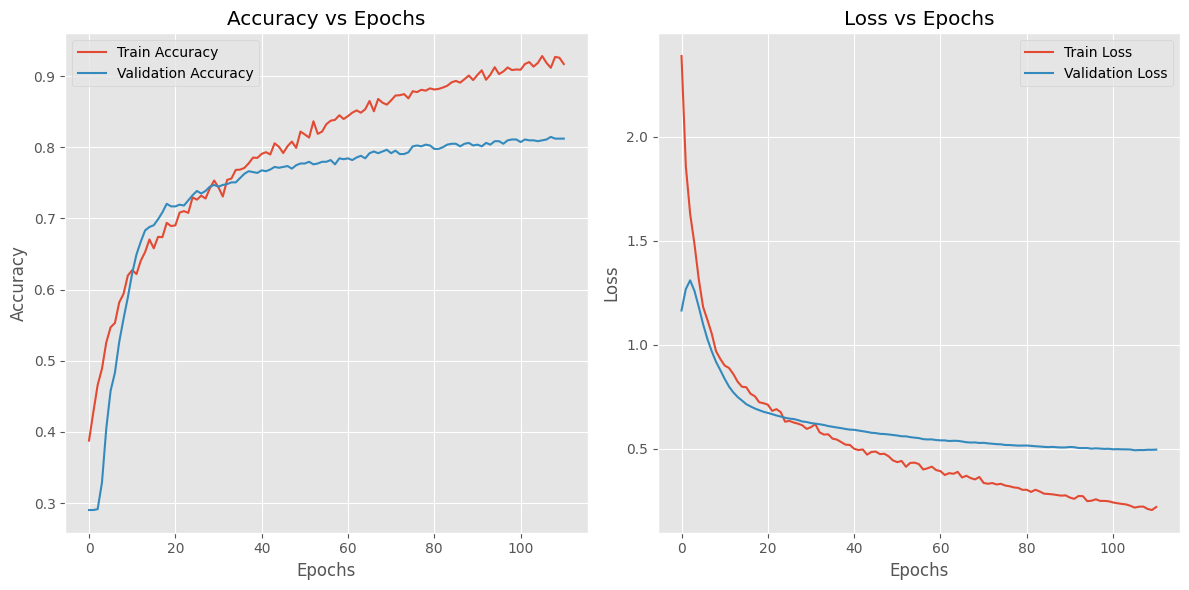

In [ ]:
import matplotlib.pyplot as plt

# Извлечение метрик из истории
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Создание графиков
plt.figure(figsize=(12, 6))

# График точности
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

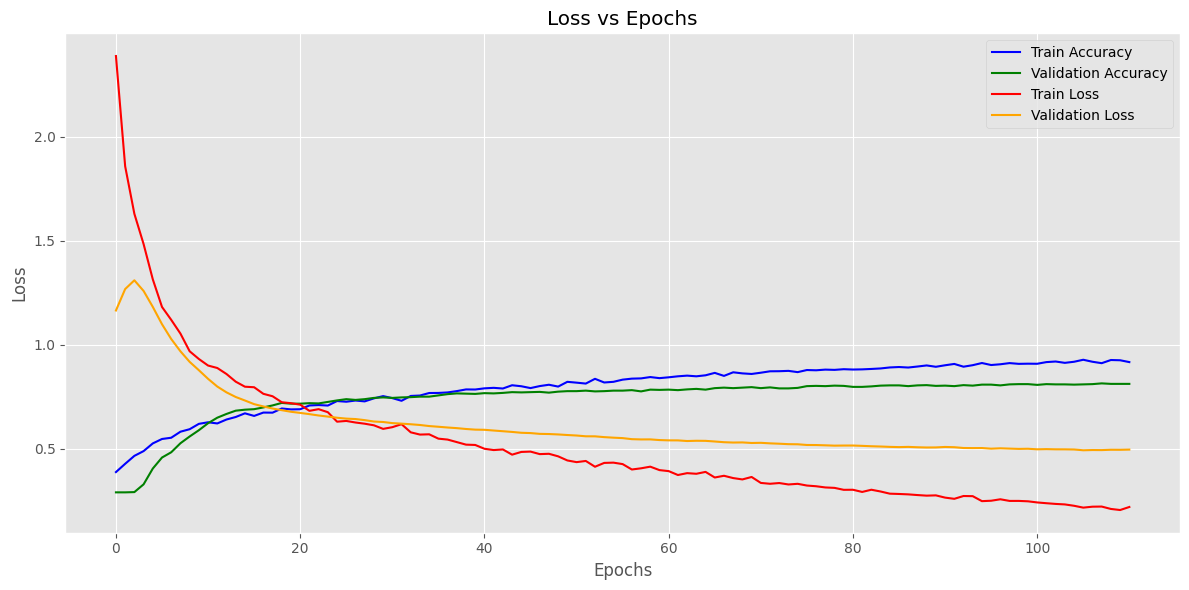

In [ ]:
import matplotlib.pyplot as plt

# Извлечение метрик из истории
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Создание графиков
plt.figure(figsize=(12, 6))

# График точности
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='green')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# График потерь
plt.plot(train_loss, label='Train Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Общие настройки
plt.tight_layout()
plt.show()

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/models/best_model_3_2.h5')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score     support
Бабочки        0.777778  0.813278  0.795132  241.000000
Пауки          0.785965  0.769759  0.777778  291.000000
Слоны          0.860068  0.845638  0.852792  298.000000
accuracy       0.809639  0.809639  0.809639    0.809639
macro avg      0.807937  0.809558  0.808567  830.000000
weighted avg   0.810193  0.809639  0.809750  830.000000


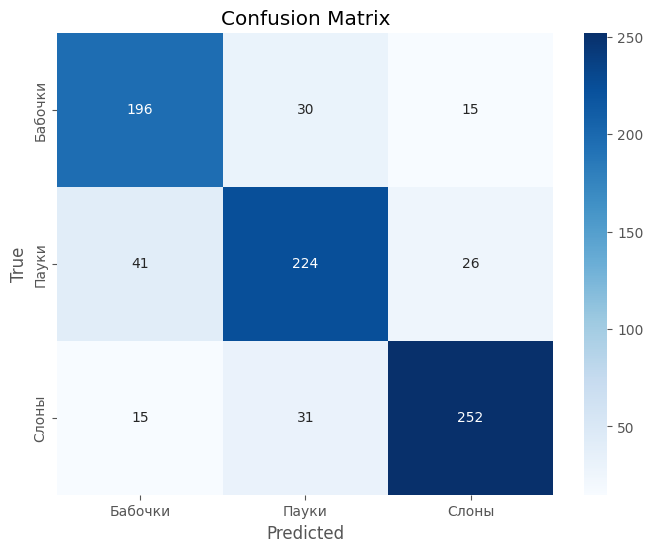

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Предсказания модели
predictions = model.predict(testX, batch_size=64)

# Преобразуем метки в индексы
testY_argmax = testY.argmax(axis=1)
predictions_argmax = predictions.argmax(axis=1)

# Отчет классификации с использованием pandas DataFrame для красивого отображения
report = classification_report(testY_argmax, predictions_argmax, target_names=lb.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Выводим отчет
print(report_df)

# Строим матрицу путаницы
cm = confusion_matrix(testY_argmax, predictions_argmax)

# Визуализация матрицы путаницы
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 2.3. Сохраните полученные модели

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
model_1 = keras.models.load_model('/content/drive/MyDrive/models/best_model_2_2.h5')
model_2 = keras.models.load_model('/content/drive/MyDrive/models/best_model_3_2.h5')


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


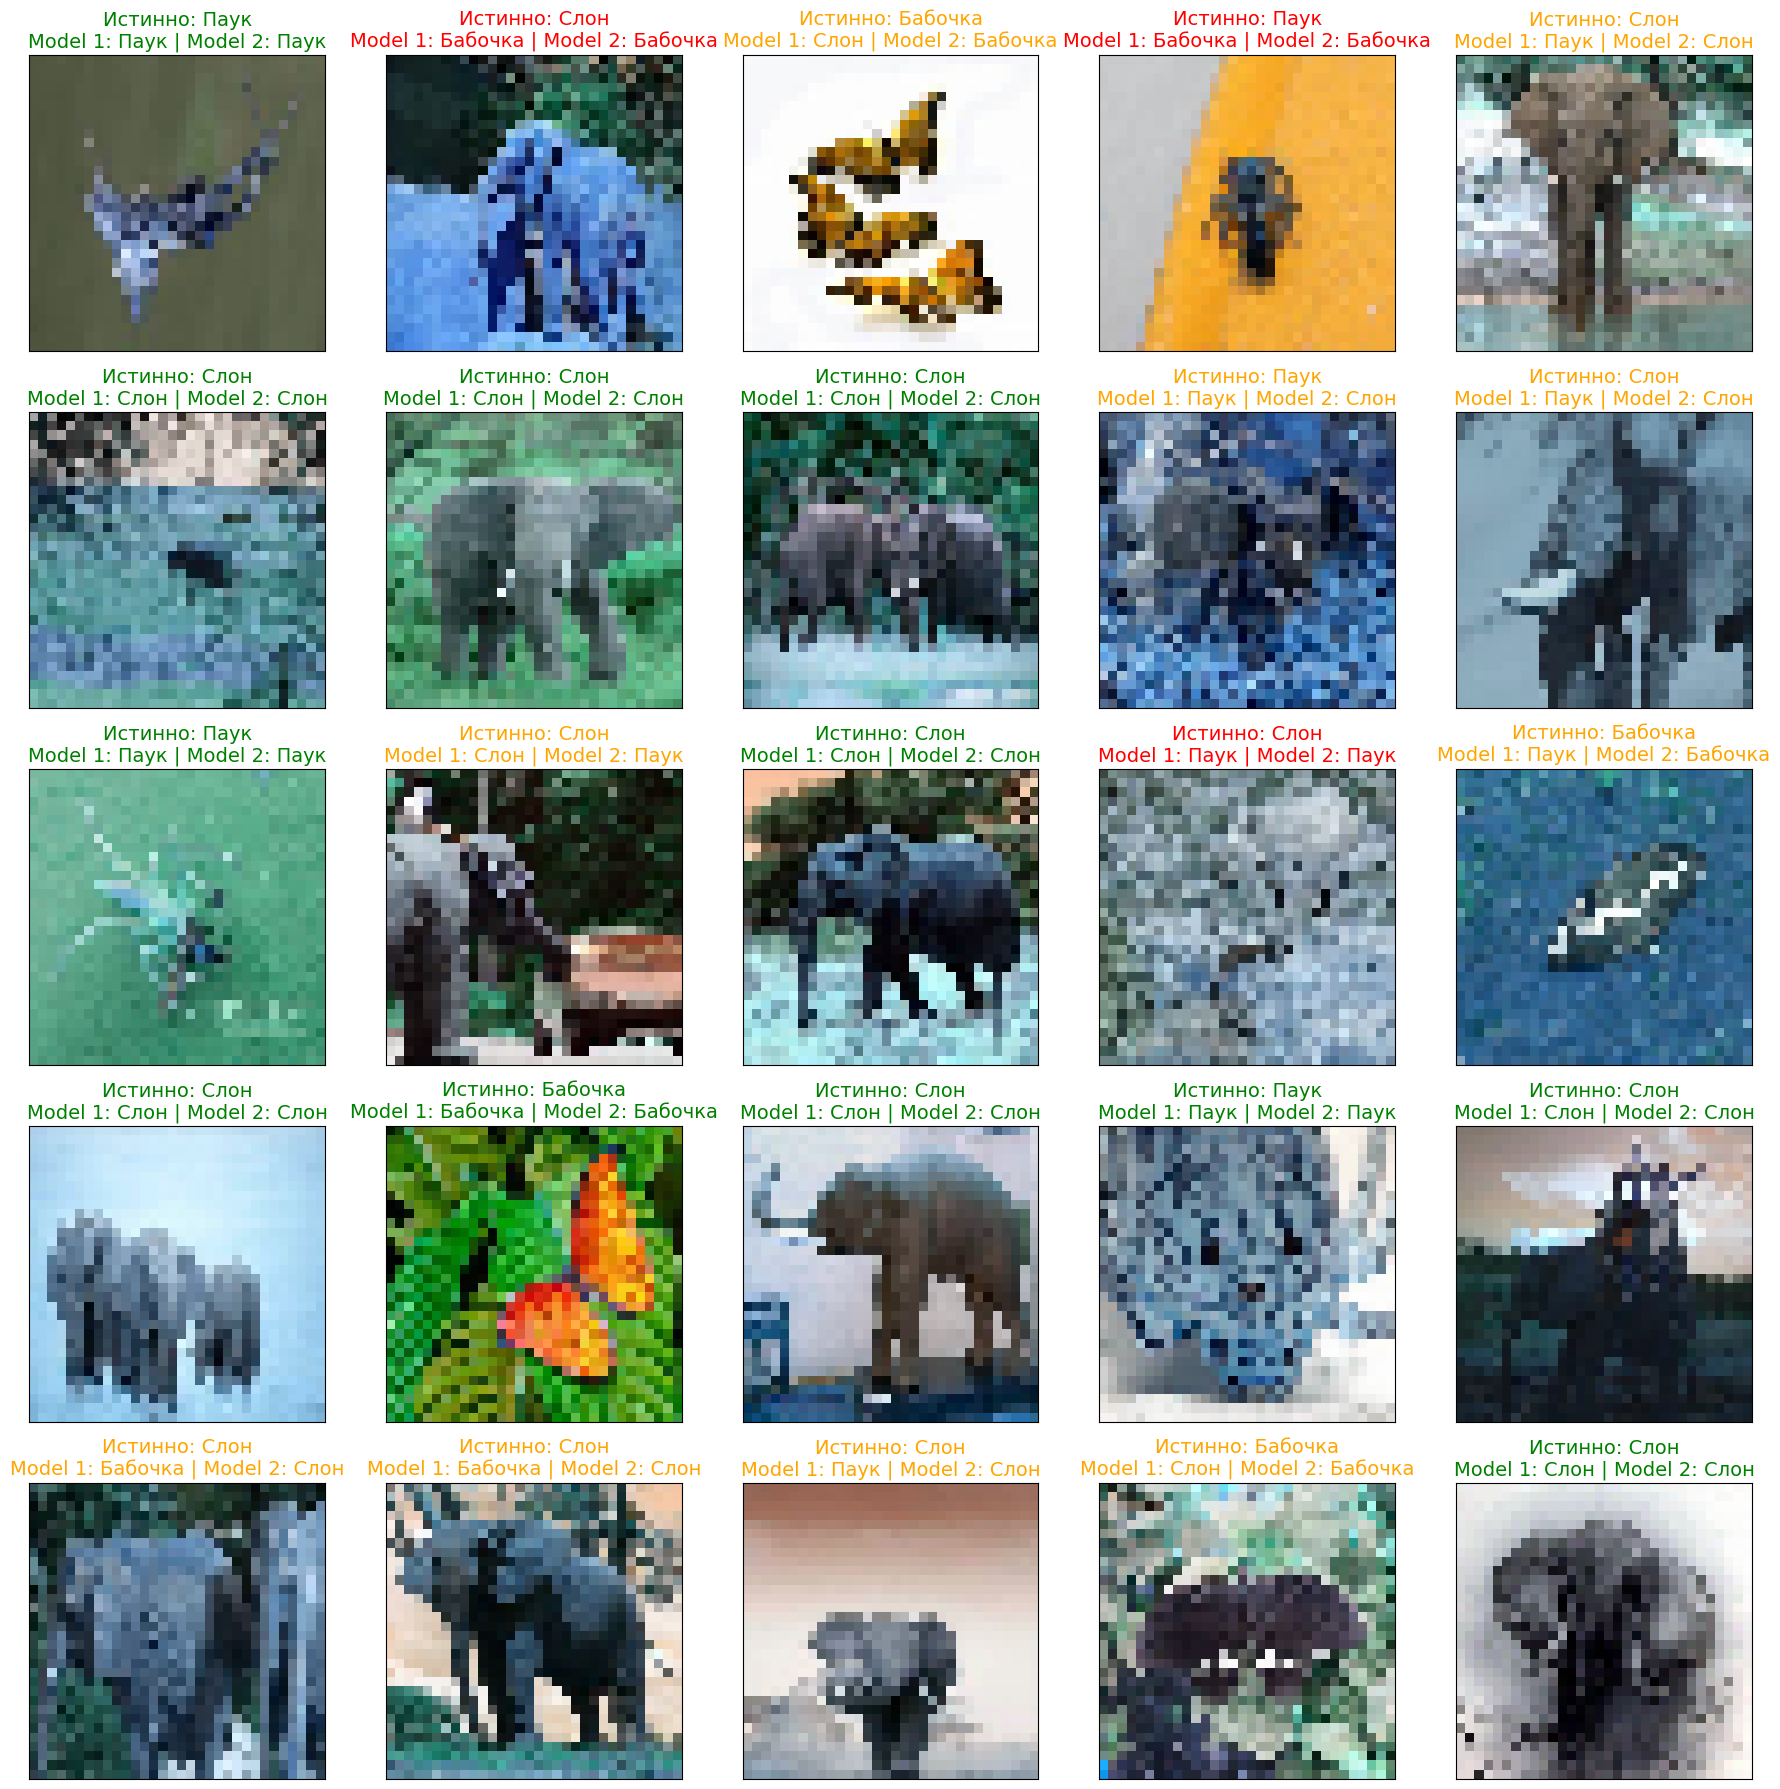

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

# Названия классов
class_names = ['Бабочка', 'Паук', 'Слон']

# Плоские данные для model_1
testX_flat = testX.reshape((testX.shape[0], -1))

# Предсказания сразу на все testX
preds_1 = model_1.predict(testX_flat)
preds_2 = model_2.predict(testX)

pred_classes_1 = np.argmax(preds_1, axis=1)
pred_classes_2 = np.argmax(preds_2, axis=1)
true_classes = np.argmax(testY, axis=1)

# Случайные 25 индексов
rand_idx = np.random.choice(len(testX), 25, replace=False)

# График
plt.figure(figsize=(18, 18))
for pos, idx in enumerate(rand_idx):
    plt.subplot(5, 5, pos + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img = testX[idx]
    plt.imshow(img.squeeze(), cmap='gray' if img.shape[-1] == 1 else None)

    true_lbl = true_classes[idx]
    pred1 = pred_classes_1[idx]
    pred2 = pred_classes_2[idx]

    # Цвет подписи
    if pred1 == true_lbl and pred2 == true_lbl:
        color = 'green'
    elif pred1 == true_lbl or pred2 == true_lbl:
        color = 'orange'
    else:
        color = 'red'

    plt.title(f"Истинно: {class_names[true_lbl]}\nModel 1: {class_names[pred1]} | Model 2: {class_names[pred2]}",
              color=color, fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Подсчёт точности
accuracy_1 = np.mean(predicted_classes_1 == testY_labels)
accuracy_2 = np.mean(predicted_classes_2 == testY_labels)

print(f"Точность модели 1: {accuracy_1:.4f}")
print(f"Точность модели 2: {accuracy_2:.4f}")

# Вывод
if accuracy_1 > accuracy_2:
    print("Модель 1 работает лучше")
elif accuracy_2 > accuracy_1:
    print("Модель 2 работает лучше")
else:
    print("Обе модели показывают одинаковую точность")

Точность модели 1: 0.6205
Точность модели 2: 0.8096
Модель 2 работает лучше


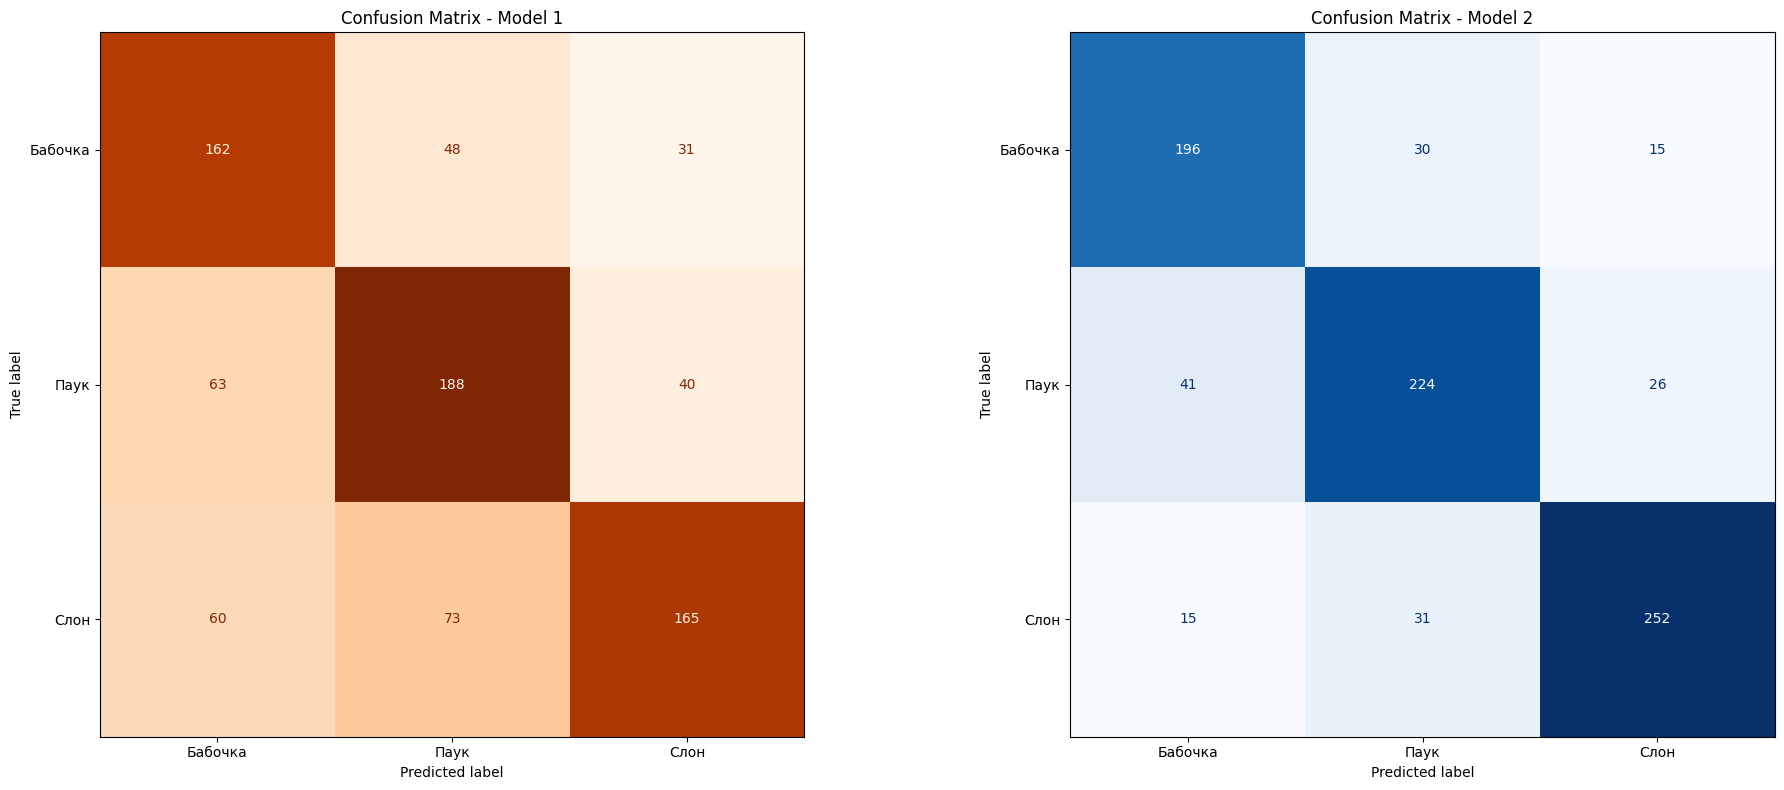

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Названия классов
class_names = ['Бабочка', 'Паук', 'Слон']

# Преобразуем one-hot в обычные метки
true_labels = np.argmax(testY, axis=1)

# Матрицы ошибок
cm1 = confusion_matrix(true_labels, predicted_classes_1)
cm2 = confusion_matrix(true_labels, predicted_classes_2)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Матрица для модели 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names)
disp1.plot(ax=axes[0], cmap='Oranges', colorbar=False)
axes[0].set_title('Confusion Matrix - Model 1')

# Матрица для модели 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
disp2.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Confusion Matrix - Model 2')

plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio

In [ ]:
from keras.models import load_model
import gradio
import pickle
import cv2

def preprocess_image_new(img, compression_size = 32):

  image = img.copy()
  image = cv2.resize(image, (compression_size, compression_size))
  image = image.astype("float") / 255.0

  return image

In [ ]:
def get_predict_new(img, preprocess_func = preprocess_image_new, model_path = "/content/drive/MyDrive/models/best_model_3_2.h5", label_path = "/content/drive/MyDrive/models/label_bin_2"):

  model = load_model("/content/drive/MyDrive/models/best_model_3_2.h5")
  lb = pickle.loads(open("/content/drive/MyDrive/models/label_bin_2", "rb").read())
  image = preprocess_image_new(img.copy())
  image = image.reshape(-1, 32, 32, 3)
  preds = model.predict(image)
  confidences = {lb.classes_[i]: float(preds[0][i]) for i in range(len(preds[0]))}

  return confidences


In [ ]:
lb = pickle.loads(open("/content/drive/MyDrive/models/label_bin_2", "rb").read())

In [ ]:
interface_new = gradio.Interface(
    fn=get_predict_new,
    inputs=gradio.Image(label="Загрузите изображение"),
    outputs= gradio.Label(num_top_classes=len(lb.classes_)),
    examples=["/content/drive/MyDrive/animals_dataset/бабочка.jpg",
              "/content/drive/MyDrive/animals_dataset/паук_2.jpg",
              "/content/drive/MyDrive/animals_dataset/слон.jpg"]
)

interface_new.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://103b9bbb9e58eace28.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://103b9bbb9e58eace28.gradio.live


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import SGD, Adam
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

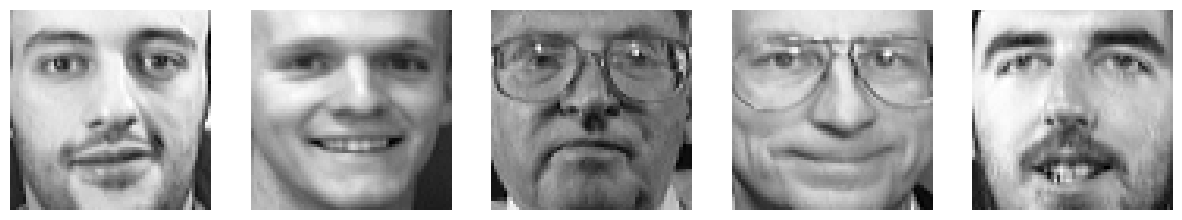

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

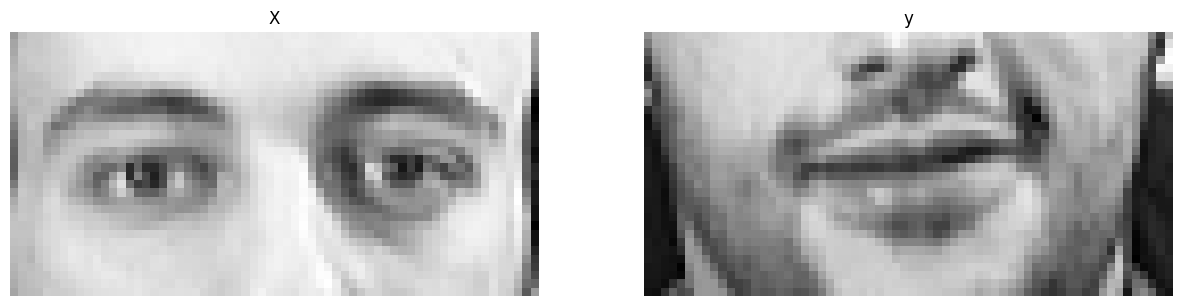

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

model = keras.Sequential([
    Input(shape=(32, 64, 1)),

    # Больше лёгких сверток без жесткой потери данных
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.4),

    Dense(2048, activation='linear')  # Восстанавливаем 32*64 = 2048
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2048)           │     1,050,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,310,816 (20.26 MB)

 Trainable params: 5,310,624 (20.26 MB)

 Non-trainable params: 192 (768.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
from keras.metrics import MeanAbsoluteError

INIT_LR = 0.0001
opt = Adam(learning_rate=INIT_LR, use_ema=True)

model.compile(optimizer=opt, loss='mae', metrics=[MeanAbsoluteError()])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_mean_absolute_error',
    mode="min",
    patience=10,        # Ждать 10 эпох без улучшения
    restore_best_weights=True # Восстановить лучшие веса
)
checkpoint = ModelCheckpoint(
    filepath="best_model_3_3.h5",
    monitor="val_mean_absolute_error",
    mode='min',
    save_best_only=True,
    save_weights_only=False, # Сохраняем полную модель
    verbose=1
)

In [ ]:
# 1. Добавляем канал для изображений
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# 2. Расплющиваем y
y_train_flat = y_train.reshape((y_train.shape[0], -1))
y_test_flat = y_test.reshape((y_test.shape[0], -1))

# 3. Проверяем размерности
print(X_train.shape)       # (320, 32, 64, 1)
print(y_train_flat.shape)   # (320, 2048)

print(X_test.shape)        # (80, 32, 64, 1)
print(y_test_flat.shape)    # (80, 2048)

(320, 32, 64, 1)
(320, 2048)
(80, 32, 64, 1)
(80, 2048)


In [ ]:
# Обучение модели
history = model.fit(
    X_train, y_train_flat,
    validation_data=(X_test, y_test_flat),
    epochs=1000,
    batch_size=32,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6104 - mean_absolute_error: 0.6104
Epoch 1: val_mean_absolute_error improved from inf to 0.49944, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - val_loss: 0.4994 - val_mean_absolute_error: 0.4994
Epoch 2/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4429 - mean_absolute_error: 0.4429 
Epoch 2: val_mean_absolute_error improved from 0.49944 to 0.49606, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - val_loss: 0.4961 - val_mean_absolute_error: 0.4961
Epoch 3/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3940 - mean_absolute_error: 0.3940
Epoch 3: val_mean_absolute_error improved from 0.49606 to 0.49145, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - val_loss: 0.4915 - val_mean_absolute_error: 0.4915
Epoch 4/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3419 - mean_absolute_error: 0.3419
Epoch 4: val_mean_absolute_error improved from 0.49145 to 0.48241, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - val_loss: 0.4824 - val_mean_absolute_error: 0.4824
Epoch 5/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 
Epoch 5: val_mean_absolute_error improved from 0.48241 to 0.47355, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - val_loss: 0.4735 - val_mean_absolute_error: 0.4735
Epoch 6/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2585 - mean_absolute_error: 0.2585
Epoch 6: val_mean_absolute_error improved from 0.47355 to 0.46442, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - val_loss: 0.4644 - val_mean_absolute_error: 0.4644
Epoch 7/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 
Epoch 7: val_mean_absolute_error improved from 0.46442 to 0.45455, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - val_loss: 0.4546 - val_mean_absolute_error: 0.4546
Epoch 8/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2168 - mean_absolute_error: 0.2168
Epoch 8: val_mean_absolute_error improved from 0.45455 to 0.44100, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - val_loss: 0.4410 - val_mean_absolute_error: 0.4410
Epoch 9/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2023 - mean_absolute_error: 0.2023
Epoch 9: val_mean_absolute_error improved from 0.44100 to 0.43138, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - val_loss: 0.4314 - val_mean_absolute_error: 0.4314
Epoch 10/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1912 - mean_absolute_error: 0.1912
Epoch 10: val_mean_absolute_error improved from 0.43138 to 0.42540, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - val_loss: 0.4254 - val_mean_absolute_error: 0.4254
Epoch 11/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 
Epoch 11: val_mean_absolute_error improved from 0.42540 to 0.41426, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - val_loss: 0.4143 - val_mean_absolute_error: 0.4143
Epoch 12/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 
Epoch 12: val_mean_absolute_error improved from 0.41426 to 0.40561, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - val_loss: 0.4056 - val_mean_absolute_error: 0.4056
Epoch 13/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1674 - mean_absolute_error: 0.1674
Epoch 13: val_mean_absolute_error improved from 0.40561 to 0.39361, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - val_loss: 0.3936 - val_mean_absolute_error: 0.3936
Epoch 14/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1631 - mean_absolute_error: 0.1631
Epoch 14: val_mean_absolute_error improved from 0.39361 to 0.37997, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - val_loss: 0.3800 - val_mean_absolute_error: 0.3800
Epoch 15/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1627 - mean_absolute_error: 0.1627
Epoch 15: val_mean_absolute_error improved from 0.37997 to 0.37854, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - val_loss: 0.3785 - val_mean_absolute_error: 0.3785
Epoch 16/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 
Epoch 16: val_mean_absolute_error improved from 0.37854 to 0.36736, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - val_loss: 0.3674 - val_mean_absolute_error: 0.3674
Epoch 17/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 
Epoch 17: val_mean_absolute_error improved from 0.36736 to 0.35554, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - val_loss: 0.3555 - val_mean_absolute_error: 0.3555
Epoch 18/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 
Epoch 18: val_mean_absolute_error improved from 0.35554 to 0.33673, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - val_loss: 0.3367 - val_mean_absolute_error: 0.3367
Epoch 19/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 
Epoch 19: val_mean_absolute_error improved from 0.33673 to 0.32581, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - val_loss: 0.3258 - val_mean_absolute_error: 0.3258
Epoch 20/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 
Epoch 20: val_mean_absolute_error improved from 0.32581 to 0.32130, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - val_loss: 0.3213 - val_mean_absolute_error: 0.3213
Epoch 21/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 
Epoch 21: val_mean_absolute_error improved from 0.32130 to 0.31248, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - val_loss: 0.3125 - val_mean_absolute_error: 0.3125
Epoch 22/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1451 - mean_absolute_error: 0.1451
Epoch 22: val_mean_absolute_error improved from 0.31248 to 0.31241, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - val_loss: 0.3124 - val_mean_absolute_error: 0.3124
Epoch 23/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1453 - mean_absolute_error: 0.1453
Epoch 23: val_mean_absolute_error improved from 0.31241 to 0.30997, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - val_loss: 0.3100 - val_mean_absolute_error: 0.3100
Epoch 24/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 
Epoch 24: val_mean_absolute_error improved from 0.30997 to 0.30773, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - val_loss: 0.3077 - val_mean_absolute_error: 0.3077
Epoch 25/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 25: val_mean_absolute_error improved from 0.30773 to 0.28081, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - val_loss: 0.2808 - val_mean_absolute_error: 0.2808
Epoch 26/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1416 - mean_absolute_error: 0.1416
Epoch 26: val_mean_absolute_error did not improve from 0.28081
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - val_loss: 0.2987 - val_mean_absolute_error: 0.2987
Epoch 27/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 
Epoch 27: val_mean_absolute_error improved from 0.28081 to 0.27909, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - val_loss: 0.2791 - val_mean_absolute_error: 0.2791
Epoch 28/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 28: val_mean_absolute_error did not improve from 0.27909
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.2880 - val_mean_absolute_error: 0.2880
Epoch 29/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 
Epoch 29: val_mean_absolute_error improved from 0.27909 to 0.27168, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - val_loss: 0.2717 - val_mean_absolute_error: 0.2717
Epoch 30/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1334 - mean_absolute_error: 0.1334
Epoch 30: val_mean_absolute_error improved from 0.27168 to 0.26138, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - val_loss: 0.2614 - val_mean_absolute_error: 0.2614
Epoch 31/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1342 - mean_absolute_error: 0.1342
Epoch 31: val_mean_absolute_error did not improve from 0.26138
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.2639 - val_mean_absolute_error: 0.2639
Epoch 32/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1332 - mean_absolute_error: 0.1332
Epoch 32: val_mean_absolute_error improved from 0.26138 to 0.24397, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - val_loss: 0.2440 - val_mean_absolute_error: 0.2440
Epoch 33/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1367 - mean_absolute_error: 0.1367
Epoch 33: val_mean_absolute_error did not improve from 0.24397
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.2494 - val_mean_absolute_error: 0.2494
Epoch 34/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 
Epoch 34: val_mean_absolute_error did not improve from 0.24397
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - val_loss: 0.2502 - val_mean_absolute_error: 0.2502
Epoch 35/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1311 - mean_absolute_error: 0.1311
Epoch 35: val_mean_absolute_error did not improve from 0.24397
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - val_loss: 0.2409 - val_mean_absolute_error: 0.2409
Epoch 38/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1330 - mean_absolute_error: 0.1330
Epoch 38: val_mean_absolute_error improved from 0.24090 to 0.23438, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - val_loss: 0.2344 - val_mean_absolute_error: 0.2344
Epoch 39/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 
Epoch 39: val_mean_absolute_error improved from 0.23438 to 0.23178, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - val_loss: 0.2318 - val_mean_absolute_error: 0.2318
Epoch 40/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 
Epoch 40: val_mean_absolute_error improved from 0.23178 to 0.21513, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - val_loss: 0.2151 - val_mean_absolute_error: 0.2151
Epoch 41/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1273 - mean_absolute_error: 0.1273
Epoch 41: val_mean_absolute_error improved from 0.21513 to 0.21307, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - val_loss: 0.2131 - val_mean_absolute_error: 0.2131
Epoch 42/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 
Epoch 42: val_mean_absolute_error did not improve from 0.21307
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - val_loss: 0.2258 - val_mean_absolute_error: 0.2258
Epoch 43/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1245 - mean_absolute_error: 0.1245
Epoch 43: val_mean_absolute_error improved from 0.21307 to 0.20992, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - val_loss: 0.2099 - val_mean_absolute_error: 0.2099
Epoch 44/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1238 - mean_absolute_error: 0.1238
Epoch 44: val_mean_absolute_error improved from 0.20992 to 0.18109, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - val_loss: 0.1811 - val_mean_absolute_error: 0.1811
Epoch 45/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 
Epoch 45: val_mean_absolute_error did not improve from 0.18109
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - val_loss: 0.1933 - val_mean_absolute_error: 0.1933
Epoch 46/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 
Epoch 46: val_mean_absolute_error did not improve from 0.18109
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - val_loss: 0.2053 - val_mean_absolute_error: 0.2053
Epoch 47/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1234 - mean_absolute_error: 0.1234
Epoch 47: val_mean_absolute_error did not improve from 0.18109
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - val_loss: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1741 - val_mean_absolute_error: 0.1741
Epoch 51/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1217 - mean_absolute_error: 0.1217
Epoch 51: val_mean_absolute_error improved from 0.17410 to 0.16819, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - val_loss: 0.1682 - val_mean_absolute_error: 0.1682
Epoch 52/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1186 - mean_absolute_error: 0.1186
Epoch 52: val_mean_absolute_error improved from 0.16819 to 0.15451, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 647ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545
Epoch 53/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1192 - mean_absolute_error: 0.1192
Epoch 53: val_mean_absolute_error improved from 0.15451 to 0.15283, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528
Epoch 54/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1175 - mean_absolute_error: 0.1175
Epoch 54: val_mean_absolute_error did not improve from 0.15283
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - val_loss: 0.1622 - val_mean_absolute_error: 0.1622
Epoch 55/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1158 - mean_absolute_error: 0.1158
Epoch 55: val_mean_absolute_error did not improve from 0.15283
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - val_loss: 0.1565 - val_mean_absolute_error: 0.1565
Epoch 56/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1131 - mean_absolute_error: 0.1131
Epoch 56: val_mean_absolute_error improved from 0.15283 to 0.15240, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524
Epoch 57/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1142 - mean_absolute_error: 0.1142
Epoch 57: val_mean_absolute_error did not improve from 0.15240
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - val_loss: 0.1702 - val_mean_absolute_error: 0.1702
Epoch 58/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1204 - mean_absolute_error: 0.1204
Epoch 58: val_mean_absolute_error improved from 0.15240 to 0.15011, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501
Epoch 59/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 
Epoch 59: val_mean_absolute_error did not improve from 0.15011
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - val_loss: 0.1511 - val_mean_absolute_error: 0.1511
Epoch 60/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1160 - mean_absolute_error: 0.1160
Epoch 60: val_mean_absolute_error improved from 0.15011 to 0.13776, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378
Epoch 61/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1165 - mean_absolute_error: 0.1165
Epoch 61: val_mean_absolute_error did not improve from 0.13776
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 62/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1161 - mean_absolute_error: 0.1161
Epoch 62: val_mean_absolute_error improved from 0.13776 to 0.11306, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - val_loss: 0.1131 - val_mean_absolute_error: 0.1131
Epoch 63/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 
Epoch 63: val_mean_absolute_error did not improve from 0.11306
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - val_loss: 0.1302 - val_mean_absolute_error: 0.1302
Epoch 64/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1133 - mean_absolute_error: 0.1133
Epoch 64: val_mean_absolute_error did not improve from 0.11306
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - val_loss: 0.1311 - val_mean_absolute_error: 0.1311
Epoch 65/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1134 - mean_absolute_error: 0.1134
Epoch 65: val_mean_absolute_error did not improve from 0.11306
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - val_loss: 0.0984 - val_mean_absolute_error: 0.0984
Epoch 70/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1171 - mean_absolute_error: 0.1171
Epoch 70: val_mean_absolute_error did not improve from 0.09842
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - val_loss: 0.1033 - val_mean_absolute_error: 0.1033
Epoch 71/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1107 - mean_absolute_error: 0.1107
Epoch 71: val_mean_absolute_error did not improve from 0.09842
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - val_loss: 0.1175 - val_mean_absolute_error: 0.1175
Epoch 72/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1122 - mean_absolute_error: 0.1122  
Epoch 72: val_mean_absolute_error did not improve from 0.09842
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - val_loss: 0.0938 - val_mean_absolute_error: 0.0938
Epoch 75/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 
Epoch 75: val_mean_absolute_error did not improve from 0.09384
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - val_loss: 0.1047 - val_mean_absolute_error: 0.1047
Epoch 76/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1084 - mean_absolute_error: 0.1084
Epoch 76: val_mean_absolute_error did not improve from 0.09384
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - val_loss: 0.0968 - val_mean_absolute_error: 0.0968
Epoch 77/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1099 - mean_absolute_error: 0.1099
Epoch 77: val_mean_absolute_error improved from 0.09384 to 0.09264, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - val_loss: 0.0926 - val_mean_absolute_error: 0.0926
Epoch 78/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1129 - mean_absolute_error: 0.1129
Epoch 78: val_mean_absolute_error did not improve from 0.09264
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - val_loss: 0.1062 - val_mean_absolute_error: 0.1062
Epoch 79/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1086 - mean_absolute_error: 0.1086
Epoch 79: val_mean_absolute_error did not improve from 0.09264
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - val_loss: 0.0936 - val_mean_absolute_error: 0.0936
Epoch 80/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1061 - mean_absolute_error: 0.1061
Epoch 80: val_mean_absolute_error did not improve from 0.09264
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - val_loss: 0.0

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - val_loss: 0.0926 - val_mean_absolute_error: 0.0926
Epoch 82/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 
Epoch 82: val_mean_absolute_error did not improve from 0.09257
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - val_loss: 0.0940 - val_mean_absolute_error: 0.0940
Epoch 83/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 
Epoch 83: val_mean_absolute_error improved from 0.09257 to 0.09160, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - val_loss: 0.0916 - val_mean_absolute_error: 0.0916
Epoch 84/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 
Epoch 84: val_mean_absolute_error did not improve from 0.09160
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - val_loss: 0.1000 - val_mean_absolute_error: 0.1000
Epoch 85/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 
Epoch 85: val_mean_absolute_error improved from 0.09160 to 0.09100, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - val_loss: 0.0910 - val_mean_absolute_error: 0.0910
Epoch 86/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 
Epoch 86: val_mean_absolute_error did not improve from 0.09100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - val_loss: 0.1101 - val_mean_absolute_error: 0.1101
Epoch 87/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 
Epoch 87: val_mean_absolute_error did not improve from 0.09100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - val_loss: 0.0932 - val_mean_absolute_error: 0.0932
Epoch 88/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1114 - mean_absolute_error: 0.1114
Epoch 88: val_mean_absolute_error did not improve from 0.09100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - val_loss: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - val_loss: 0.0905 - val_mean_absolute_error: 0.0905
Epoch 91/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 
Epoch 91: val_mean_absolute_error did not improve from 0.09053
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - val_loss: 0.0964 - val_mean_absolute_error: 0.0964
Epoch 92/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 
Epoch 92: val_mean_absolute_error did not improve from 0.09053
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - val_loss: 0.0920 - val_mean_absolute_error: 0.0920
Epoch 93/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 
Epoch 93: val_mean_absolute_error did not improve from 0.09053
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - val_loss: 0.0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - val_loss: 0.0903 - val_mean_absolute_error: 0.0903
Epoch 96/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1050 - mean_absolute_error: 0.1050  
Epoch 96: val_mean_absolute_error did not improve from 0.09034
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918
Epoch 97/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1008 - mean_absolute_error: 0.1008  
Epoch 97: val_mean_absolute_error improved from 0.09034 to 0.09016, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - val_loss: 0.0902 - val_mean_absolute_error: 0.0902
Epoch 98/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1079 - mean_absolute_error: 0.1079
Epoch 98: val_mean_absolute_error did not improve from 0.09016
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - val_loss: 0.0910 - val_mean_absolute_error: 0.0910
Epoch 99/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1056 - mean_absolute_error: 0.1056
Epoch 99: val_mean_absolute_error improved from 0.09016 to 0.08941, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - val_loss: 0.0894 - val_mean_absolute_error: 0.0894
Epoch 100/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 100: val_mean_absolute_error did not improve from 0.08941
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - val_loss: 0.0898 - val_mean_absolute_error: 0.0898
Epoch 101/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 
Epoch 101: val_mean_absolute_error did not improve from 0.08941
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - val_loss: 0.0937 - val_mean_absolute_error: 0.0937
Epoch 102/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 
Epoch 102: val_mean_absolute_error did not improve from 0.08941
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - val_l

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - val_loss: 0.0893 - val_mean_absolute_error: 0.0893
Epoch 107/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1018 - mean_absolute_error: 0.1018
Epoch 107: val_mean_absolute_error improved from 0.08931 to 0.08824, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - val_loss: 0.0882 - val_mean_absolute_error: 0.0882
Epoch 108/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 
Epoch 108: val_mean_absolute_error improved from 0.08824 to 0.08716, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872
Epoch 109/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 
Epoch 109: val_mean_absolute_error did not improve from 0.08716
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - val_loss: 0.0879 - val_mean_absolute_error: 0.0879
Epoch 110/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0999 - mean_absolute_error: 0.0999
Epoch 110: val_mean_absolute_error did not improve from 0.08716
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - val_loss: 0.1010 - val_mean_absolute_error: 0.1010
Epoch 111/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 
Epoch 111: val_mean_absolute_error did not improve from 0.08716
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - val_l

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - val_loss: 0.0868 - val_mean_absolute_error: 0.0868
Epoch 115/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 
Epoch 115: val_mean_absolute_error did not improve from 0.08682
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - val_loss: 0.0870 - val_mean_absolute_error: 0.0870
Epoch 116/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0993 - mean_absolute_error: 0.0993
Epoch 116: val_mean_absolute_error did not improve from 0.08682
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - val_loss: 0.0900 - val_mean_absolute_error: 0.0900
Epoch 117/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0988 - mean_absolute_error: 0.0988
Epoch 117: val_mean_absolute_error improved from 0.08682 to 0.08667, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867
Epoch 118/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0977 - mean_absolute_error: 0.0977
Epoch 118: val_mean_absolute_error did not improve from 0.08667
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - val_loss: 0.0871 - val_mean_absolute_error: 0.0871
Epoch 119/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0993 - mean_absolute_error: 0.0993
Epoch 119: val_mean_absolute_error improved from 0.08667 to 0.08622, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - val_loss: 0.0862 - val_mean_absolute_error: 0.0862
Epoch 120/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0977 - mean_absolute_error: 0.0977
Epoch 120: val_mean_absolute_error did not improve from 0.08622
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - val_loss: 0.0864 - val_mean_absolute_error: 0.0864
Epoch 121/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 
Epoch 121: val_mean_absolute_error did not improve from 0.08622
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.0868 - val_mean_absolute_error: 0.0868
Epoch 122/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0980 - mean_absolute_error: 0.0980
Epoch 122: val_mean_absolute_error improved from 0.08622 to 0.08562, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - val_loss: 0.0856 - val_mean_absolute_error: 0.0856
Epoch 123/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 
Epoch 123: val_mean_absolute_error did not improve from 0.08562
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - val_loss: 0.0884 - val_mean_absolute_error: 0.0884
Epoch 124/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1008 - mean_absolute_error: 0.1008
Epoch 124: val_mean_absolute_error did not improve from 0.08562
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - val_loss: 0.0889 - val_mean_absolute_error: 0.0889
Epoch 125/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 
Epoch 125: val_mean_absolute_error improved from 0.08562 to 0.08512, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - val_loss: 0.0851 - val_mean_absolute_error: 0.0851
Epoch 126/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 
Epoch 126: val_mean_absolute_error did not improve from 0.08512
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - val_loss: 0.0879 - val_mean_absolute_error: 0.0879
Epoch 127/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 
Epoch 127: val_mean_absolute_error did not improve from 0.08512
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872
Epoch 128/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0938 - mean_absolute_error: 0.0938
Epoch 128: val_mean_absolute_error did not improve from 0.08512
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - val_l

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846
Epoch 131/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0976 - mean_absolute_error: 0.0976
Epoch 131: val_mean_absolute_error did not improve from 0.08463
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906
Epoch 132/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0969 - mean_absolute_error: 0.0969
Epoch 132: val_mean_absolute_error improved from 0.08463 to 0.08441, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - val_loss: 0.0844 - val_mean_absolute_error: 0.0844
Epoch 133/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 
Epoch 133: val_mean_absolute_error did not improve from 0.08441
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - val_loss: 0.0864 - val_mean_absolute_error: 0.0864
Epoch 134/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0956 - mean_absolute_error: 0.0956
Epoch 134: val_mean_absolute_error did not improve from 0.08441
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0851 - val_mean_absolute_error: 0.0851
Epoch 135/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 
Epoch 135: val_mean_absolute_error did not improve from 0.08441
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - val_l

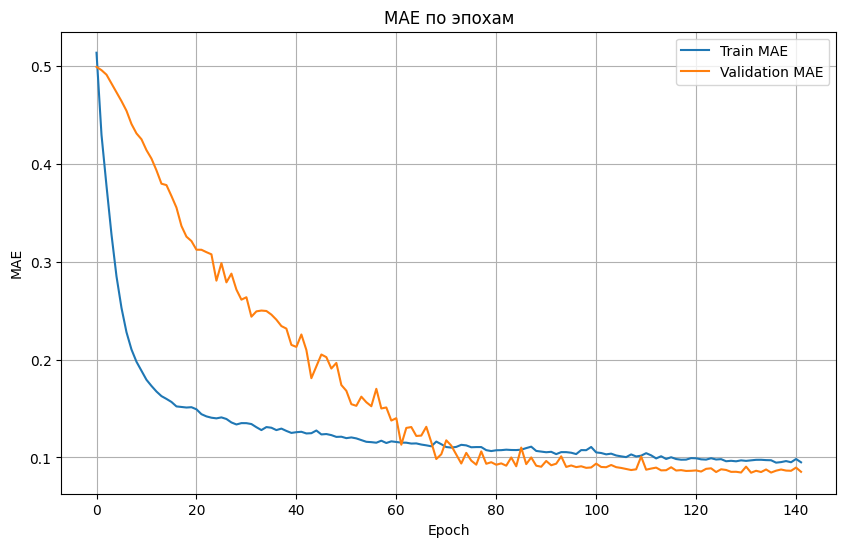

In [ ]:
import matplotlib.pyplot as plt

# История ошибок
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE по эпохам')
plt.legend()
plt.grid(True)
plt.show()

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
modelFace = keras.models.load_model('/content/drive/MyDrive/models/best_model_3_3.h5', compile=False)

In [ ]:
modelFace.compile(optimizer=opt, loss='mae', metrics=['mae'])

In [ ]:
# Предсказания
predictions = modelFace.predict(X_test)

# predictions будет иметь форму (количество изображений, 2048)
print(predictions.shape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
(80, 2048)


In [ ]:
# Преобразуем предсказания обратно в изображения
predictions_reshaped = predictions.reshape((-1, 32, 64))
print(predictions_reshaped.shape)  # (batch_size, 32, 64)

(80, 32, 64)


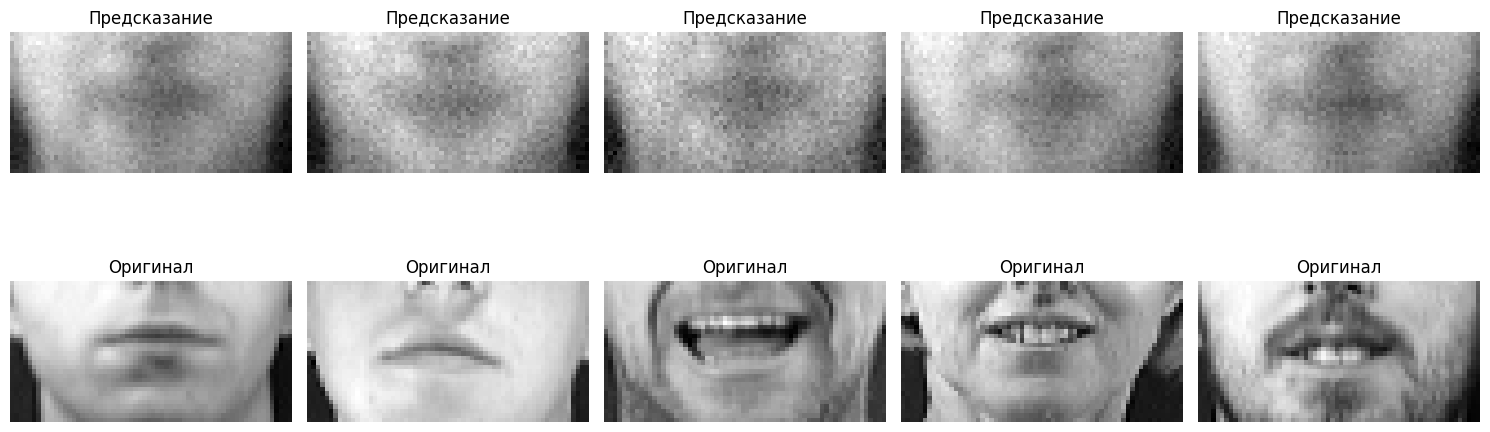

In [ ]:
import matplotlib.pyplot as plt

n = 5  # сколько лиц показать
plt.figure(figsize=(15, 6))

for i in range(n):
    # Предсказание
    plt.subplot(2, n, i + 1)
    plt.imshow(predictions_reshaped[i], cmap='gray')
    plt.title('Предсказание')
    plt.axis('off')

    # Оригинал
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title('Оригинал')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

y_test_flat = y_test.reshape(y_test.shape[0], -1)
test_mae = mean_absolute_error(y_test_flat, predictions)
print(f"Средняя абсолютная ошибка (MAE) на тестовых данных: {test_mae:.6f}")

Средняя абсолютная ошибка (MAE) на тестовых данных: 0.084410


## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
predicted_images = predictions.reshape(-1, 32, 64)

print(predicted_images.shape)

(80, 32, 64)


Отрисуйте все предсказания.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 


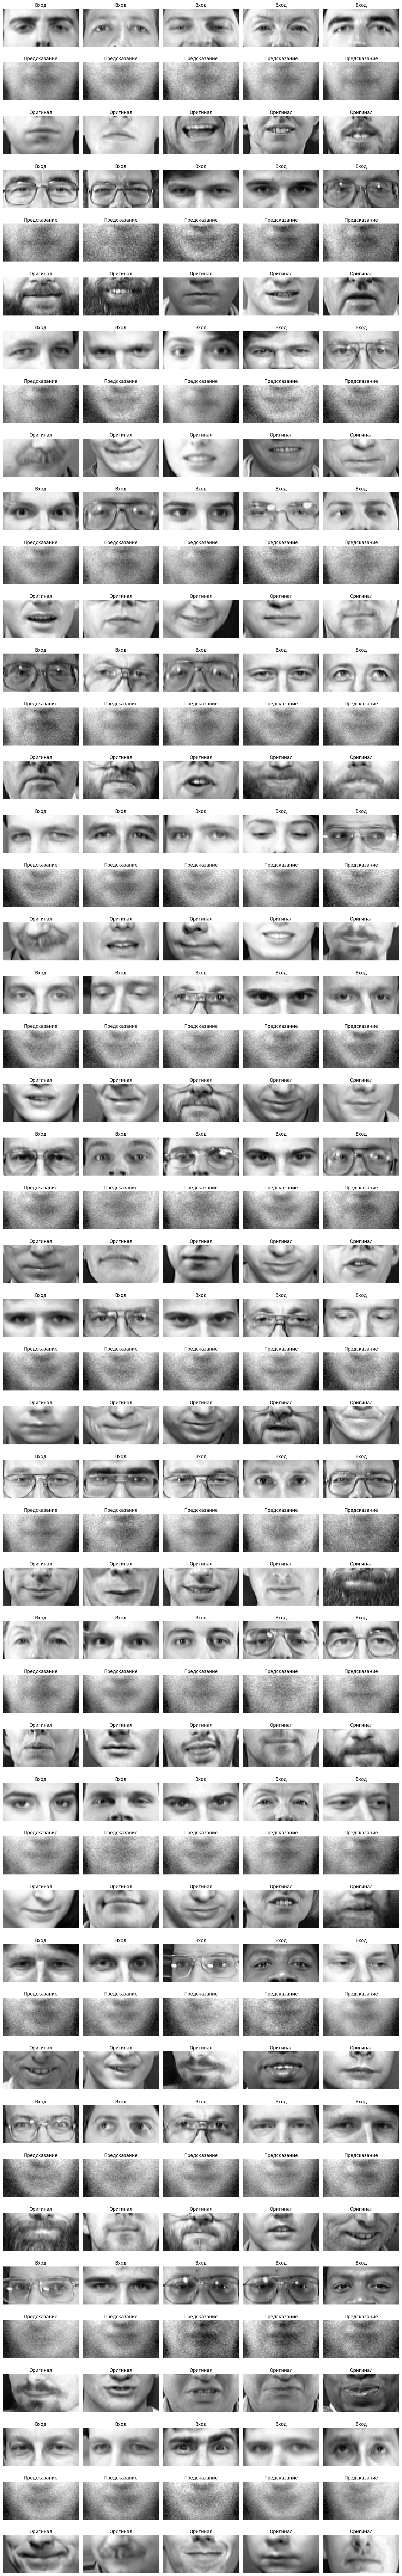

In [ ]:
import matplotlib.pyplot as plt

# Предсказания и reshape
predictions = model.predict(X_test)
predictions_reshaped = predictions.reshape(-1, 32, 64)

n = len(X_test)  # сколько всего примеров
examples_per_row = 5  # сколько картинок в одном ряду

rows = (n + examples_per_row - 1) // examples_per_row  # сколько будет рядов

plt.figure(figsize=(examples_per_row * 3, rows * 6))  # ширина на кол-во картинок, высота побольше

for i in range(n):
    row_idx = (i // examples_per_row) * 3  # каждые examples_per_row примеров — новый блок из 3 строк

    col_idx = i % examples_per_row  # столбец в пределах ряда

    # Вход
    plt.subplot(rows * 3, examples_per_row, row_idx * examples_per_row + col_idx + 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title('Вход')
    plt.axis('off')

    # Предсказание
    plt.subplot(rows * 3, examples_per_row, (row_idx + 1) * examples_per_row + col_idx + 1)
    plt.imshow(predictions_reshaped[i], cmap='gray')
    plt.title('Предсказание')
    plt.axis('off')

    # Оригинал
    plt.subplot(rows * 3, examples_per_row, (row_idx + 2) * examples_per_row + col_idx + 1)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title('Оригинал')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_from_full_image(model, image_path):
    """
    Загружает ПОЛНОЕ лицо, делит его на верх и низ, делает предсказание низа и рисует результат.

    model — обученная модель
    image_path — путь к ПОЛНОМУ изображению
    """

    # 1. Загрузка изображения
    img = image.load_img(image_path, color_mode='grayscale', target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0  # нормализация в [0,1]

    # 2. Разделение на верхнюю и нижнюю части
    upper_part = img_array[:32, :, :]  # Верхняя половина
    lower_part_true = img_array[32:, :, :]  # Настоящая нижняя половина

    # 3. Подготовка верхней части для модели
    upper_part_input = np.expand_dims(upper_part, axis=0)  # (1, 32, 64, 1)

    # 4. Предсказание
    prediction = model.predict(upper_part_input)
    prediction_reshaped = prediction.reshape(32, 64)

    # 5. Визуализация
    plt.figure(figsize=(6, 9))

    # Верхняя часть лица
    plt.subplot(3, 1, 1)
    plt.imshow(upper_part.squeeze(), cmap='gray')
    plt.title('Верх лица (оригинал)')
    plt.axis('off')

    # Предсказанный низ
    plt.subplot(3, 1, 2)
    plt.imshow(prediction_reshaped, cmap='gray')
    plt.title('Предсказанный низ лица')
    plt.axis('off')

    # Настоящий низ|
    plt.subplot(3, 1, 3)
    plt.imshow(lower_part_true.squeeze(), cmap='gray')
    plt.title('Настоящий низ лица')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


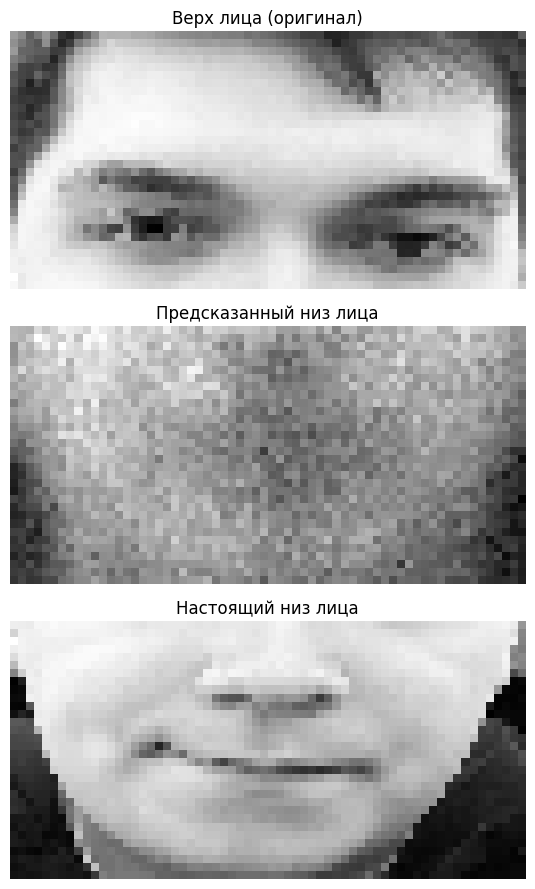

In [ ]:
predict_from_full_image(model, '/content/drive/MyDrive/face.jpg')